# Convert a 2D LDVM solution to 3D using a quasi-steady LLT (circulation correction)

In [1]:
include("../src/UNSflow.jl")

INFO: Recompiling stale cache file /Users/kramesh/.julia/lib/v0.5/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /Users/kramesh/.julia/lib/v0.5/PyPlot.ji for module PyPlot.
INFO: Installing matplotlib via the Conda matplotlib package...


Fetching package metadata .......
Solving package specifications: ..........

Package plan for installation in environment /Users/kramesh/.julia/v0.5/Conda/deps/usr:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libpng-1.6.22              |                0         225 KB
    freetype-2.5.5             |                1         734 KB
    pyparsing-2.1.4            |           py27_0          70 KB
    cycler-0.10.0              |           py27_0          11 KB
    matplotlib-1.5.3           |      np111py27_1         6.0 MB
    ------------------------------------------------------------
                                           Total:         7.0 MB

The following NEW packages will be INSTALLED:

    cycler:     0.10.0-py27_0    
    freetype:   2.5.5-1          
    libpng:     1.6.22-0         
    matplotlib: 1.5.3-np111py27_1
    pyparsing:  2.1.4-py27_0     

Fetching packag

LoadError: LoadError: LoadError: ArgumentError: Module NLsolve not found in current path.
Run `Pkg.add("NLsolve")` to install the NLsolve package.
while loading /Users/kramesh/Documents/Workspace/UNSflow/src/UNSflow.jl, in expression starting on line 12
while loading In[1], in expression starting on line 1

In [2]:
include("../src/UNSflow.jl")


Use "(eld::EldUpDef)(...)" instead.

Use "(eld::EldUptstartDef)(...)" instead.

Use "(cons::ConstDef)(...)" instead.

Use "(eld::EldRampReturnDef)(...)" instead.

Use "(kin::SinDef)(...)" instead.

Use "(kin::CosDef)(...)" instead.
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:294
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:294
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:486
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:605
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:673

Use "(eld::EldUpIntDef)(...)" instead.

Use "(eld::EldUpInttstartDef)(...)" instead.

Use "(kelv::KelvinCondition)(...)" instead.

Use "(kelv::KelvinCondition2DOF)(...)" instead.

Use "(kelv::KelvinCondition2DFree)(...)" instead.

Use "(kelv::KelvinConditionwFlap)(...)" instead.

Use "(kelv::KelvinKutta)(...)" instead.

Use "(kelv::KelvinKutta2DOF)(...)" instead.

Use "(kelv::KelvinKutta2DFree)(...)" instead

UNSflow

In [3]:
using UNSflow

In [45]:
alphadef = EldUpDef(45*pi/180,pi/8,0.8)
hdef = ConstDef(0.)
udef = ConstDef(1.)
full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0 #leading edge

surf = TwoDSurf("FlatPlate", pvt,full_kinem)

curfield = TwoDFlowField()

dtstar = 0.0075
nsteps =round(Int,2.5/dtstar)+1

mat, surf, curfield = ldvm(surf, curfield, nsteps,dtstar)

(
[0.0075 7.36966e-13 … 1.12681e-5 1.49021e-10; 0.015 8.86735e-13 … -0.00142999 1.49021e-10; … ; 2.4975 0.785398 … 4.47459 2.11505e-10; 2.505 0.785398 … 4.47284 2.11348e-10],

UNSflow.TwoDSurf(1.0,1.0,"FlatPlate",0.0,70,35,UNSflow.KinemDef(UNSflow.EldUpDef(0.7853981633974483,0.39269908169872414,0.8),UNSflow.ConstDef(0.0),UNSflow.ConstDef(1.0)),[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000518163,0.00207158,0.00465703,0.00826915,0.0129005,0.0185414,0.0251802,0.0328031,0.0413943  …  0.958606,0.967197,0.97482,0.981459,0.9871,0.991731,0.995343,0.997928,0.999482,1.0],UNSflow.KinemPar(0.7853980399798931,0.0,3.0452002087852504e-6,0.0,1.0,0.0),[-3.505,-3.50463,-3.50354,-3.50171,-3.49915,-3.49

In [46]:
k_2d = readcsv("../test/PR_2D.csv")
nsteps

334

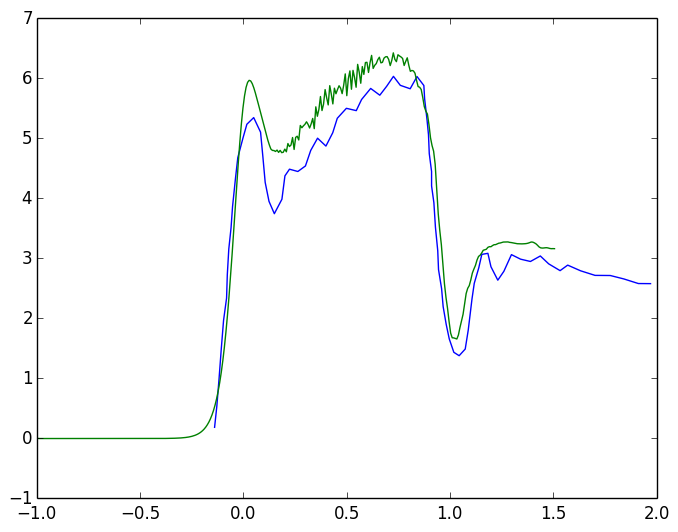

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x319ac3310>

In [47]:
plot(k_2d[:,1],k_2d[:,2])
plot(mat[:,1]-1,mat[:,6])

In [48]:
n_span = 12
n_bterm = 40

psi = zeros(n_span)
dpsi = pi/n_span

for i = 1:n_span
    psi[i] = (real(i)-0.5)*dpsi
end

In [49]:
W_mat = Array{Float64,2}[]
W_surf = TwoDSurf[]
W_curfield = TwoDFlowField[]

for i = 1:n_span
    push!(W_mat, mat)
    push!(W_surf, surf)
    push!(W_curfield, curfield)
end



In [50]:
W_mat

12-element Array{Array{Float64,2},1}:
 [0.0075 7.36966e-13 … 1.12681e-5 1.49021e-10; 0.015 8.86735e-13 … -0.00142999 1.49021e-10; … ; 2.4975 0.785398 … 4.47459 2.11505e-10; 2.505 0.785398 … 4.47284 2.11348e-10]
 [0.0075 7.36966e-13 … 1.12681e-5 1.49021e-10; 0.015 8.86735e-13 … -0.00142999 1.49021e-10; … ; 2.4975 0.785398 … 4.47459 2.11505e-10; 2.505 0.785398 … 4.47284 2.11348e-10]
 [0.0075 7.36966e-13 … 1.12681e-5 1.49021e-10; 0.015 8.86735e-13 … -0.00142999 1.49021e-10; … ; 2.4975 0.785398 … 4.47459 2.11505e-10; 2.505 0.785398 … 4.47284 2.11348e-10]
 [0.0075 7.36966e-13 … 1.12681e-5 1.49021e-10; 0.015 8.86735e-13 … -0.00142999 1.49021e-10; … ; 2.4975 0.785398 … 4.47459 2.11505e-10; 2.505 0.785398 … 4.47284 2.11348e-10]
 [0.0075 7.36966e-13 … 1.12681e-5 1.49021e-10; 0.015 8.86735e-13 … -0.00142999 1.49021e-10; … ; 2.4975 0.785398 … 4.47459 2.11505e-10; 2.505 0.785398 … 4.47284 2.11348e-10]
 [0.0075 7.36966e-13 … 1.12681e-5 1.49021e-10; 0.015 8.86735e-13 … -0.00142999 1.49021e-10; … ; 2

In [53]:
AR = 4
u = 1 #uref
c = 1


lhs = zeros(n_span,n_bterm)
rhs = zeros(n_span)
b_coeff = zeros(nsteps,n_bterm)

dt = W_mat[1][2,1] - W_mat[1][1,1]

cnc_f = zeros(nsteps)
cnnc_f = zeros(nsteps)

bdot = zeros(nsteps,n_bterm)

for i = 1:nsteps
    for j = 1:n_span
        for n = 1:n_bterm
            lhs[j,n] = sin(n*psi[j])*(sin(psi[j]) + (n*pi/(2*AR)))
        end
        rhs[j] = pi*sin(psi[j])*W_mat[j][i,9]/(2*AR)
    end
        
    b_coeff[i,:] = \(lhs, rhs)
    if i >= 2   
        bdot[i,:] = (b_coeff[i,:] - b_coeff[i-1,:])/dt
    end
       
end

a03d = zeros(nsteps,n_span)
cd_ind = zeros(nsteps)
a0dot3d = zeros(nsteps,n_span)


for i = 1:nsteps
    cd_ind[i] = 0
    for n = 1:n_bterm
        cd_ind[i] = cd_ind[i] + real(n)*b_coeff[i,n]^2
    end
    cd_ind[i] = cd_ind[i]*pi*AR
    for j = 1:n_span
        a03d[i,j] = 0
        for n = 1:n_bterm
            a03d[i,j] = a03d[i,j] - real(n)*b_coeff[i,n]*sin(n*psi[j])/sin(psi[j])
            a0dot3d[i,j] = a0dot3d[i,j] - real(n)*bdot[i,n]*sin(n*psi[j])/sin(psi[j])
        end
    end
end

W_alpha = zeros(nsteps,n_span)
W_h = zeros(nsteps,n_span)
W_hdot = zeros(nsteps,n_span)
W_u = zeros(nsteps,n_span)
W_u[:,:] = 1
W_alpha[:,:] = 0
for i = 1:nsteps
    for j = 1:n_span
        W_alpha[i,j] = W_mat[j][i,2]
    end
end

W_cn = zeros(nsteps)
W_cs = zeros(nsteps)
W_cl = zeros(nsteps)
W_cd = zeros(nsteps)
W_cdi = zeros(nsteps)

cn3d = zeros(nsteps, n_span)
cs3d = zeros(nsteps, n_span)
cl3d = zeros(nsteps, n_span)
cd3d = zeros(nsteps, n_span)

#This is causing huge spikes just now 
#a0dot3d = zeros(nsteps,n_span)

for i = 1:nsteps
    W_cn[i] = 0
    W_cs[i] = 0
    for j = 1:n_span
        cn3d[i,j] = W_mat[j][i,10] + (2*pi/u)*(W_u[i,j]*cos(W_alpha[i,j]) + W_hdot[i,j]*sin(W_alpha[i,j]))*a03d[1,j] + (2*pi*c/u)*(3*a0dot3d[i,j]/4)
        cs3d[i,j] = W_mat[j][i,11] + 2*pi*a03d[i,j]^2
        cl3d[i,j] = cn3d[i,j]*cos(W_alpha[i,j]) + cs3d[i,j]*sin(W_alpha[i,j])
        cd3d[i,j] = cn3d[i,j]*sin(W_alpha[i,j]) - cs3d[i,j]*cos(W_alpha[i,j]) 
        W_cn[i] = W_cn[i] + cn3d[i,j]*sin(psi[j])*dpsi/2
        W_cs[i] = W_cs[i] + cs3d[i,j]*sin(psi[j])*dpsi/2
        W_cl[i] = W_cl[i] + cl3d[i,j]*sin(psi[j])*dpsi/2
        W_cd[i] = W_cd[i] + cd3d[i,j]*sin(psi[j])*dpsi/2
    end
end
    

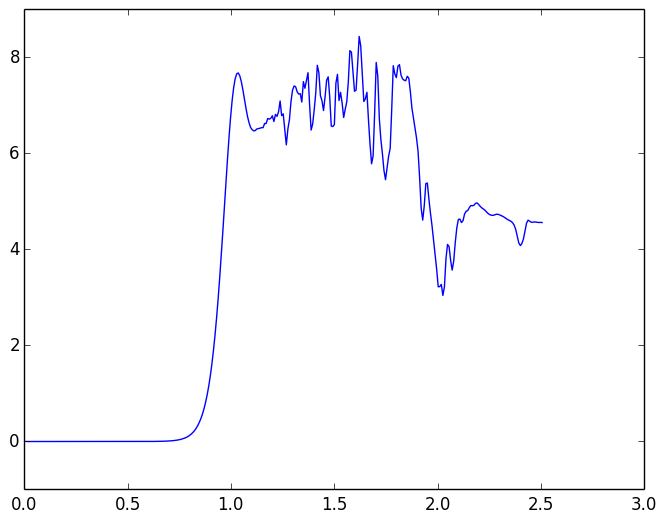

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x319eefad0>

In [54]:
plot(W_mat[1][:,1],W_cl)

# Can epps correction help to get rid of the oscillations - or is including the unsteady term here fundamentally wrong?